# Machine Learning


# Home Assignment 3

### О задании

Практическое задание 5 посвящено использованию ядер в методах машинного обучения. В рамках данного задания вы:
 * исследуете вид разделяющих поверхностей в исходном пространстве в зависимости от типа используемов ядра и значений его параметров
 * используете SVD для сжатия картинок
 * исследуете обычный и ядровый PCA


## SVM

**1. (0.5 баллов)** Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно разделимыми классами;
- с хорошо разделимыми классами, но не линейно разделимыми;
- с плохо разделимыми классами.

Визуализируйте полученные выборки на плоскости.

Для генерации случайной выборки можно использовать функции из модуля [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In [12]:
import sklearn.datasets as skl
import matplotlib.pyplot as plt
%matplotlib inline

Случай линейно разделимых классов:

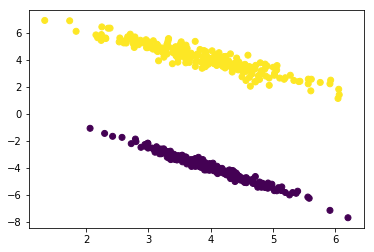

In [2]:
X_line, y_line = skl.make_classification(n_samples = 500, n_features = 2, n_informative = 2, 
                                         n_redundant = 0, n_repeated = 0, class_sep = 4,
                                         flip_y = 0, n_clusters_per_class = 1, random_state = 2)
plt.scatter(X_line[:,0], X_line[:,1], c = y_line)

Случай хорошо разделимых классов, но не линейно разделимых:

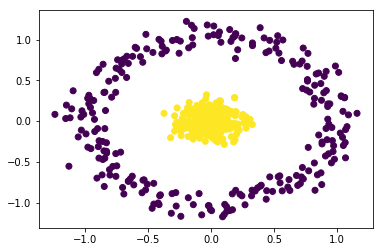

In [3]:
X_good, y_good = skl.make_circles(n_samples = 500, noise = 0.1, factor = 0.1, random_state = 2)
plt.scatter(X_good[:,0], X_good[:,1], c = y_good)

Случай плохо разделимых классов:

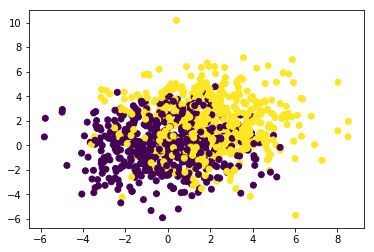

In [5]:
from sklearn.datasets import make_blobs, make_moons
import numpy as np

X_bad, y_bad = make_blobs(n_samples=1000, cluster_std = 2, centers=np.array([[0,0], [2, 2]]))
plt.scatter(X_bad[:,0], X_bad[:, 1], c=y3)

Рассмотрим(https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture13-features.pdf) двойственную задачу метода опорных векторов:
$$\begin{cases}
\sum_{i=1}^l \lambda_i - \frac{1}{2} \sum_{i, \, j =1}^l \lambda_i \lambda_j y_i y_j \langle x_i, x_j\rangle \to \max_\lambda,\\
0 \le \lambda_i \le C, i = \overline{1, l},\\
\sum_{i=1}^l \lambda_i y_i = 0.
\end{cases}$$

После решения данной задачи прогнозы для новых объектов строятся следующим образом: $a(x) = \text{sign} \left( \sum_{i=1}^l \lambda_i y_i \langle x_i, x \rangle + b \right).$

Заметим, что и оптимизационная задача, и формула итогового классификатора зависят лишь от скалярных произведений объектов, а потому в данном методе можно использовать ядра для восстановления нелинейных зависимостей.

**2. (1.5 балла)** Обучите на сгенерированных ранее двумерных выборках [ядровой SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с использованием следующих типов ядер (для различных значений гиперпараметра $C$):
- линейное: $K(x, z) = \langle x, z \rangle$;
- полиномиальное: $K(x, z) = (\gamma \langle x, z \rangle + 1)^d$ (для различных значений $\gamma, d$);
- гауссовское: $K(x, z) = \exp(-\gamma \|x - z\|^2)$ (для различных значений $\gamma$).

Визуализируйте разделяющую поверхность и разделяющую полосу:
 - для модели с линейным ядром для различных значений $C$;
 - для моделей, использующих полиномиальное и гауссовское ядро, соответствующих недообучению, нормальному поведению и переобучению.

In [13]:
from sklearn.svm import SVC
import numpy as np

In [9]:
def svm(X, y, kernel, C = 1, gamma = 1, degree = 1):
    classifier = SVC(kernel = kernel ,gamma = gamma, degree = degree, C = C)
    classifier.fit(X, y)
    
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c = y, zorder = 10, cmap = plt.cm.Paired, edgecolor = 'k')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = classifier.decision_function(np.c_[XX.ravel(), YY.ravel()])   
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap = plt.cm.Paired)
    plt.contour(XX, YY, Z, colors = ['k', 'k', 'k'], levels = [-.5, 0, .5])

1. Линейное ядро с разными значениями С. Пусть С = 1, 0.0001. Случай линейно разделимых классов.

Для C = 0.0001:

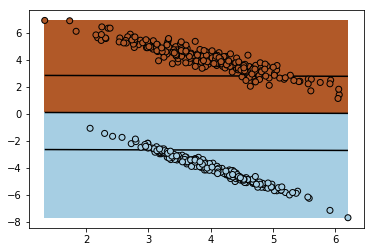

In [7]:
svm(X_line, y_line, 'linear', C = 0.0001)
plt.show()

Для C = 1: 

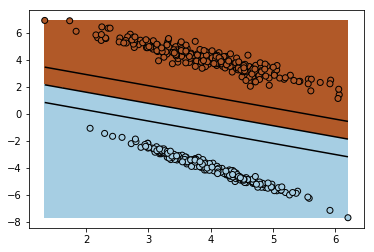

In [8]:
svm(X_line, y_line, 'linear', C = 1)
plt.show()

Случай хорошо разделимых классов, но не линейно:

Для С = 1:

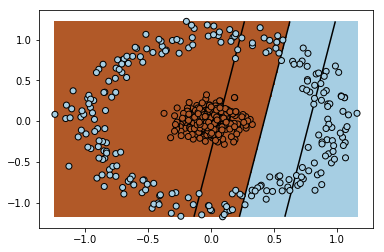

In [9]:
svm(X_good, y_good, 'linear', C = 1)
plt.show()

Для С = 0.0001:

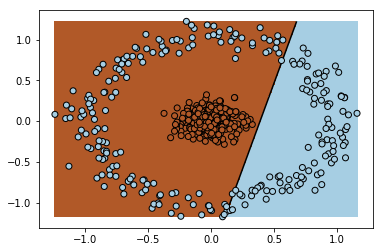

In [10]:
svm(X_good, y_good, 'linear', C = 0.0001)
plt.show()

Случай плохо разделимых классов:

Для С = 1:

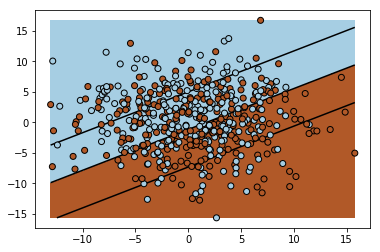

In [11]:
svm(X_bad, y_bad, 'linear', C = 1)
plt.show()

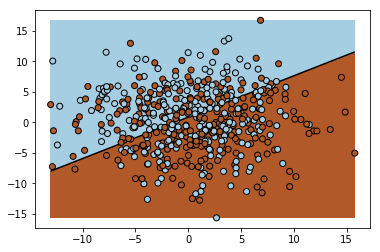

In [12]:
svm(X_bad, y_bad, 'linear', C = 0.0001)
plt.show()

2.Полиномиальное ядро с разными значениями С. Случай линейно разделимых классов. 

При С = 10:

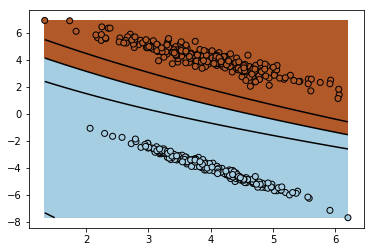

In [42]:
svm(X_line, y_line, 'poly',C = 10, gamma = 1, degree = 2)
plt.show()

При С = 0.0001

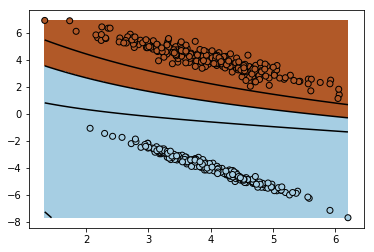

In [14]:
svm(X_line, y_line, 'poly',C = 0.0001, gamma = 1, degree = 2)
plt.show()

Случай хорошо, но не линейно разделимых классов:

При С = 10:

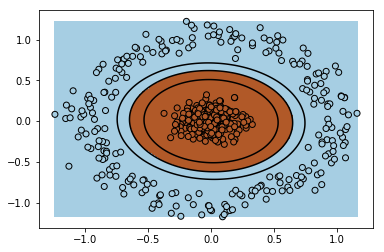

In [44]:
svm(X_good, y_good, 'poly', C = 10, gamma = 1, degree = 2)
plt.show()

При С = 0.0001:

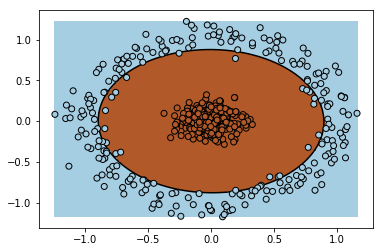

In [16]:
svm(X_good, y_good, 'poly',C = 0.0001, gamma = 1, degree = 2)
plt.show()

Случай плохо разделимых классов:

При С = 10:

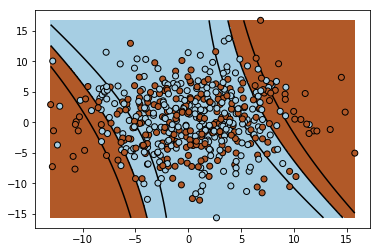

In [48]:
svm(X_bad, y_bad, 'poly',C = 100, gamma = 1, degree = 2)
plt.show()

При С = 0.0001:

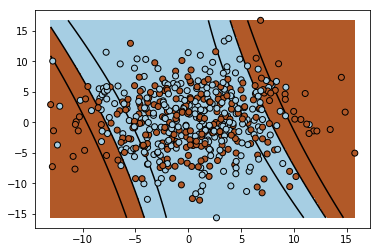

In [18]:
svm(X_bad, y_bad, 'poly',C = 0.0001, gamma = 1, degree = 2)
plt.show()

3.Гауссовское ядро с разными значениями С. Случай линейно разделимых классов:

При С = 10:

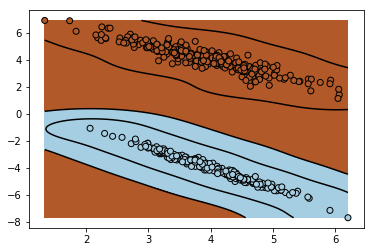

In [46]:
svm(X_line, y_line, 'rbf', gamma = 1, C = 10)
plt.show()

При С = 0.0001:

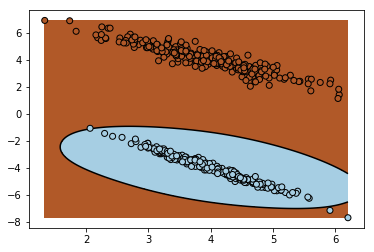

In [20]:
svm(X_line, y_line, 'rbf', gamma = 1, C = 0.0001)
plt.show()

Случай хорошо разделимых классов, но не линейно разделимых:

При С = 10:

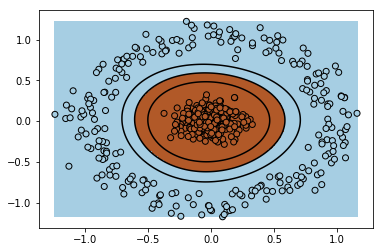

In [47]:
svm(X_good, y_good, 'rbf', gamma = 1, C = 10)
plt.show()

При С = 0.0001

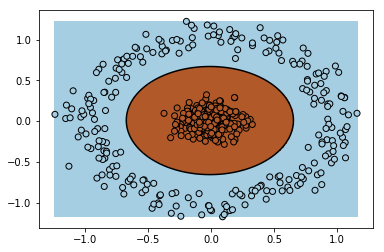

In [22]:
svm(X_good, y_good, 'rbf', gamma = 1, C = 0.0001)
plt.show()

Случай плохо разделимых классов:

При С = 10:

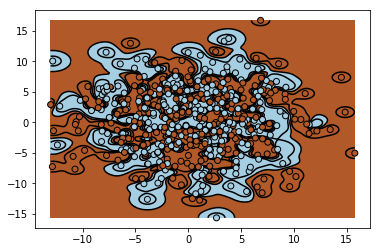

In [41]:
svm(X_bad, y_bad, 'rbf', C = 10)
plt.show()

При С = 0.0001

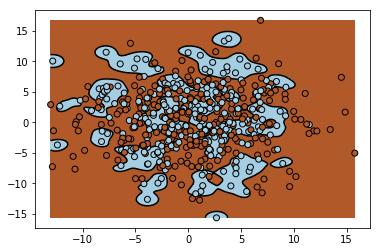

In [24]:
svm(X_bad, y_bad, 'rbf', C = 0.0001)
plt.show()

В случае плохо разделённых классов можно увидеть, что при больших значениях С наблюдается переобучение: появляются фиктивные области.  

4.Полиномиальное ядро с разными значениями гамма. Пусть gamma = 0.0001, 1 при degree = 2. Случай хорошо разделимых классов, но не линейно разделимых.

При gamma = 0.0001

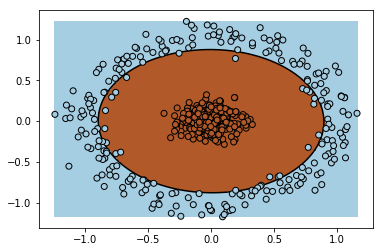

In [25]:
svm(X_good, y_good, 'poly', gamma = 0.0001, degree = 2)
plt.show()

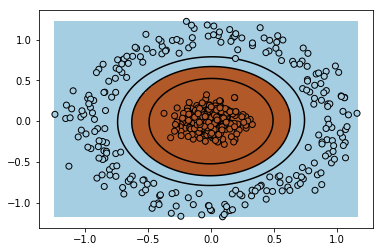

In [40]:
svm(X_good, y_good, 'poly', gamma = 1, degree = 2)
plt.show()

Разные значения параметра gamma влияют на ширину разделительной полосы.

4.Полиномиальное ядро с разными значениями degree. Пусть gamma = 1, degree = 6, 100. Случай хорошо разделимых классов, но не линейно разделимых. 

При degree = 6:

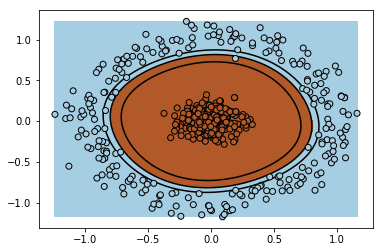

In [27]:
svm(X_good, y_good, 'poly', gamma = 1, degree = 6)
plt.show()

При degree = 100:

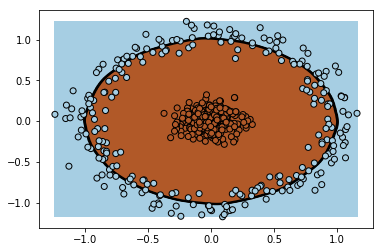

In [29]:
svm(X_good, y_good, 'poly', gamma = 1, degree = 100)
plt.show()

Чем больше значение degree, тем меньше ширина разделительной полосы.

5.Гауссовское ядро с разными значениями gamma (10, 0.1, 0.0001). Случай плохо разделимых классов. 

При gamma = 10:

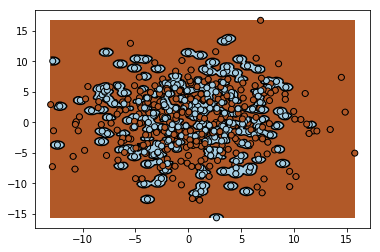

In [30]:
svm(X_bad, y_bad, 'rbf', gamma = 10)
plt.show()

При gamma = 0.1:

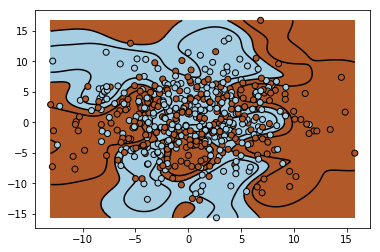

In [31]:
svm(X_bad, y_bad, 'rbf', gamma = 0.1)
plt.show()

При gamma = 0.0001

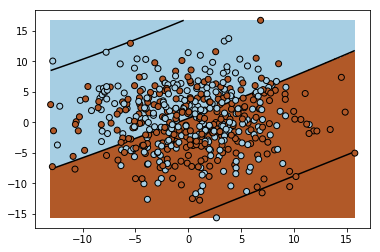

In [32]:
svm(X_bad, y_bad, 'rbf', gamma = 0.0001)
plt.show()

Как можно увидеть, при маленьких gamma (около нуля) происходит ситуация недообучения, при больших - переобучения.

**3. (1 балл)** Ответьте на следующие вопросы:
 - Как ведет себя SVM с полиномиальным ядром в зависимости от значений гиперпараметра $C$, степени ядра $d$ и параметра $\gamma$?
 - Как ведет себя SVM с гауссовским ядром в зависимости от значений гиперпараметра $C$ и $\gamma$?

**Ответ:** 

Для гауссовского ядра параметр gamma напрямую влияет на переобучение. При значении, близком к нулю, появляется линейный разделитель, при больших значениях  модель переобучается. Большие значения C также ведут к переобучению: появляются фиктивные области. 

Кроме того, во всех трёх классификаторах при различных значениях C мы можем менять ширину разделительной полосы и, соответственно, количество ошибок. Для полиномиального ядра увеличение параметра degree ведет к уменьшению разделительной полосы. Параметр gamma также влияет на разделительную полосу, однако после определенного значения (gamma = 1) существенных различий не наблюдается.

**4. (1.5 балл)** Обучите модели с использованием ядер из п. 2 для задачи бинарной классификации [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) (используйте файл train.csv) для значения $C=1.$ Для оценки качества разбейте выборку на обучающую и тестовую в отношении 50/50. Постройте модель, позволяющую достичь значения accuracy, равного 0.75, на тестовой выборке. Позволяет ли использование ядер достичь лучшего качества по сравнению с линейной моделью?

In [7]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_csv('train.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y, X = data['Activity'], data.drop('Activity', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

Случай линейного ядра:

In [14]:
svm_classifier = SVC(kernel = 'linear', gamma = 1, degree = 4)
svm_classifier.fit(X_train, y_train)
accuracy_score(svm_classifier.predict(X_test), y_test)

0.74040511727078895

В случае линейного ядра значение accuracy близко к требуемым 0.75

Для полиномиального ядра:

In [15]:
svm_classifier = SVC(kernel = 'poly', gamma = 1, degree = 4)
svm_classifier.fit(X_train, y_train)
accuracy_score(svm_classifier.predict(X_test), y_test)

0.76172707889125801

В случае полиномиального ядра результат выходит чуть лучше, нежели в случае с линейной моделью.

Для гауссовского ядра:

In [16]:
svm_classifier = SVC(kernel = 'rbf', gamma = 1)
svm_classifier.fit(X_train, y_train)
accuracy_score(svm_classifier.predict(X_test), y_test)

0.56183368869936035

In [15]:
svm_classifier = SVC(kernel = 'rbf', gamma = 5)
svm_classifier.fit(X_train, y_train)
accuracy_score(svm_classifier.predict(X_test), y_test)

0.55437100213219614

В случае гауссовского ядра результат не был хорошим даже в случае разных значений gamma.

**Ответ:** 

Полиномиальное ядро оказалось чуть лучше линейной модели, при этом оба случая показали результат, близкий к требуемому; модель с гауссовским ядром даже при разных значениях gamma хороший результат показать не смогла


## SVD

Скачайте картинку и положите в каталог рядом с ноутбуком:

In [18]:
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
import sys
import numpy as np
%matplotlib inline

img = misc.imread(r'art.jpg')

Посмотрим на нее:

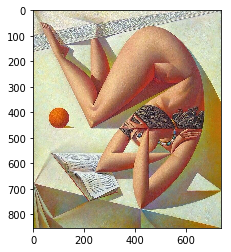

In [19]:
plt.imshow(img);

Для удобства оставим только один канал.

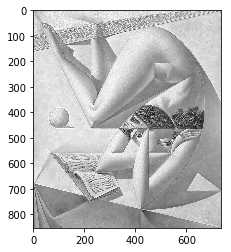

In [18]:
img = img[:,:,0]
plt.imshow(img, cmap='gray');

**5. (1 балла)** 

Главные компоненты - это матрицы вида  $u_i\sigma_iv_i^T$, где  $u_i, v_i$ это столбцы матриц $U$ и $V$ из сингулярного разложения; $\sigma_i$ соответсвующее сингулярное число. Визуализуйте первые и последние несколько компонент. Сделайте выводы.

In [20]:
U, s, V = np.linalg.svd(img, full_matrices = False)

In [21]:
U.shape

(853, 736, 3)

In [22]:
s.shape

(853, 3)

Посмотрим на первые 25 компонент:

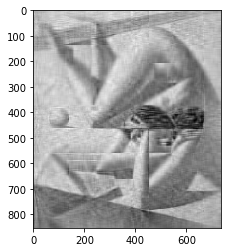

In [20]:
plt.imshow(np.dot(U[:,0:25], np.dot(np.diag(s[0:25]), V[0:25,:])), cmap = 'gray')

Посмотрим на главные компоненты с 300 по 500:

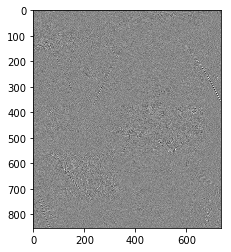

In [21]:
plt.imshow(np.dot(U[:,300:500], np.dot(np.diag(s[300:500]), V[300:500,:])), cmap = 'gray')

Основную информацию несут первые главные компоненты. 
Последующие компоненты, напротив, не несут информации, даже при условии их большого количества.

**6. (1 балл)** 

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Используйте график объясненной дисперсии для вашего выбора. Покажите полученные картинки для разного числа компонент.  Во сколько раз меньше памяти потребуется для хранения?  Вес объекта можно узнат командой * sys.getsizeof(x) *


In [23]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

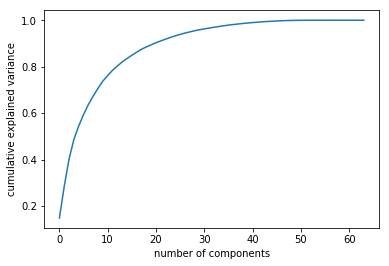

In [23]:
digits = load_digits()
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Исходя из графика, нужно взять хотя бы 40 первых главных компонент для достаточно хорошего восстановления исходного изображения.

Посмотрим на первые 5, 30, 40, 75 главных компонент:

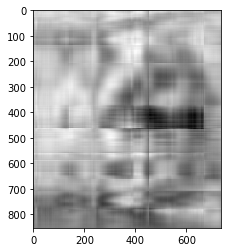

In [24]:
plot_5 = plt.imshow(np.dot(U[:,0:5], np.dot(np.diag(s[0:5]), V[0:5,:])), cmap = 'gray')
plt.show()

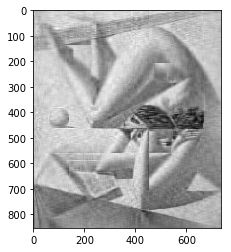

In [25]:
plot_30 = plt.imshow(np.dot(U[:,0:30], np.dot(np.diag(s[0:30]), V[0:30,:])), cmap = 'gray')
plt.show()

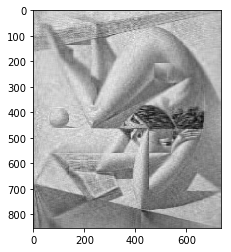

In [28]:
plot_40 = plt.imshow(np.dot(U[:,0:40], np.dot(np.diag(s[0:40]), V[0:40,:])), cmap = 'gray')
plt.show()

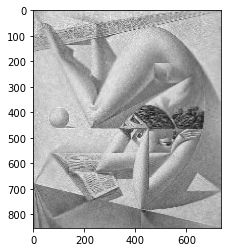

In [29]:
plot_75 = plt.imshow(np.dot(U[:,0:75], np.dot(np.diag(s[0:75]), V[0:75,:])), cmap = 'gray')
plt.show()

Как и предполагалось, 40 главных компонент достаточно для неплохого качества картинки. 


Вес исходного изображения:

In [30]:
sys.getsizeof(img)

112

Новый вес:

In [32]:
sys.getsizeof(plot_40)

56

## PCA

Рассмотрим нелиненый датасет. Попробуем решить задачу классификации, используя представление точек, полученнуе с помощью различных версий PCA.

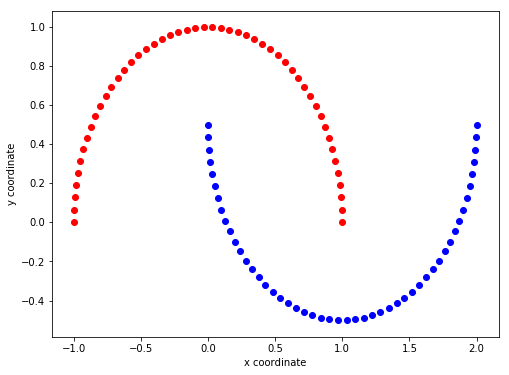

In [34]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=654)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')


plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

### Linear PCA

**7. (1 балл)** 

Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. 


In [35]:
from sklearn.decomposition import PCA

Случай одной компоненты:

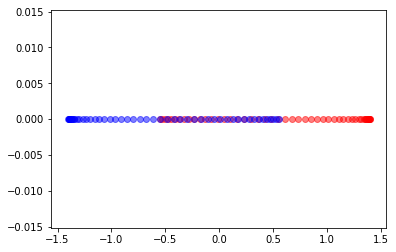

In [36]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[y == 0, 0], np.zeros((50,1)), color = 'red', alpha = 0.5)
plt.scatter(X_pca[y == 1, 0], np.zeros((50,1)), color = 'blue', alpha = 0.5)

Две компоненты:

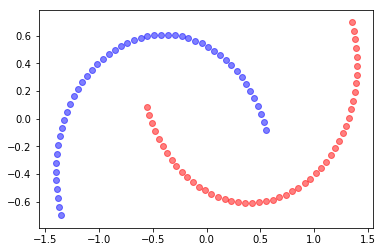

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0,1], color = 'red', alpha = 0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1,1], color = 'blue', alpha = 0.5)

### RBF PCA

**8. (0.5 балла)** 
Допишите в месте "Your code here" построение матрицы Грамма для RBF ядра, с параметром gamma. Обратите внимание, что выше в коде уже получена матрица попарных расстояний sq_dists

In [38]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [39]:
def stepwise_kpca(X, gamma, n_components):
    """
    X: A MxN dataset as NumPy array where the samples are stored as rows (M), features as columns (N).
    gamma: coefficient for the RBF kernel.
    n_components: number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    K = np.reshape(np.vectorize(np.exp)((-gamma*np.asarray(mat_sq_dists))), mat_sq_dists.shape)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

**9. (2 балл)**  
Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. Подберите такой параметр gamma, что выборка стала линейно разделимой.

Одна компонента:

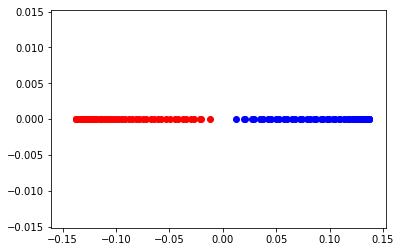

In [41]:
X_new = stepwise_kpca(X, 15, 1)
plt.scatter(X_new[y == 0, 0], np.zeros((50, 1)), color = 'red')
plt.scatter(X_new[y == 1, 0], np.zeros((50, 1)), color = 'blue')

Две компоненты:

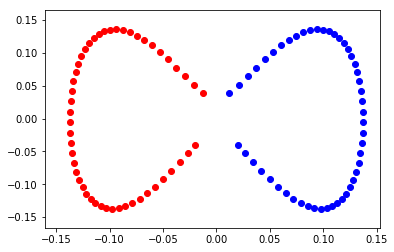

In [42]:
X_new = stepwise_kpca(X, 15, 2)
plt.scatter(X_new[y == 0, 0], X_new[y == 0, 1], color = 'red')
plt.scatter(X_new[y == 1, 0], X_new[y == 1, 1], color = 'blue')